In [1]:
import pandas as pd
from tqdm import tqdm
import os
import numpy as np
#from data import load_task3
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns

In [35]:
import pandas as pd
import os
from tqdm import tqdm
import numpy as np
#from dataclasses import dataclass, field
#from transformers import HfArgumentParser
#from sklearn.metrics import f1_score, recall_score, precision_score
# Train and Evaluation data needs to be in a Pandas Dataframe containing at least two columns, a 'text' and a 'labels' column. The `labels` column should contain multi-hot encoded lists.

TASK3_LABELS_EN = ['Appeal_to_Authority', 'Appeal_to_Fear-Prejudice',
       'Appeal_to_Hypocrisy', 'Appeal_to_Popularity',
       'Causal_Oversimplification', 'Conversation_Killer', 'Doubt',
       'Exaggeration-Minimisation', 'False_Dilemma-No_Choice',
       'Flag_Waving', 'Guilt_by_Association', 'Loaded_Language',
       'Name_Calling-Labeling', 'Obfuscation-Vagueness-Confusion',
       'Red_Herring', 'Repetition', 'Slogans', 'Straw_Man',
       'Whataboutism']
TASK3_LABELS = ['Appeal_to_Authority', 'Appeal_to_Fear-Prejudice',
       'Appeal_to_Hypocrisy', 'Appeal_to_Popularity', 'Appeal_to_Time',
       'Appeal_to_Values', 'Causal_Oversimplification',
       'Consequential_Oversimplification', 'Conversation_Killer', 'Doubt',
       'Exaggeration-Minimisation', 'False_Dilemma-No_Choice', 'Flag_Waving',
       'Guilt_by_Association', 'Loaded_Language', 'Name_Calling-Labeling',
       'Obfuscation-Vagueness-Confusion', 'Questioning_the_Reputation',
       'Red_Herring', 'Repetition', 'Slogans', 'Straw_Man', 'Whataboutism']

TASK2_LABELS = ['Capacity_and_resources', 'Crime_and_punishment', 'Cultural_identity',
       'Economic', 'External_regulation_and_reputation',
       'Fairness_and_equality', 'Health_and_safety',
       'Legality_Constitutionality_and_jurisprudence', 'Morality',
       'Policy_prescription_and_evaluation', 'Political', 'Public_opinion',
       'Quality_of_life', 'Security_and_defense']

def make_dataframe_task2(input_folder, labels_folder=None, target='type'):
    #MAKE TXT DATAFRAME
    text = []
    
    for fil in tqdm(filter(lambda x: x.endswith('.txt'), os.listdir(input_folder))):

        iD, txt = fil[7:].split('.')[0], open(input_folder +fil, 'r', encoding='utf-8').read() 
        text.append((iD, txt))

    df_text = pd.DataFrame(text, columns=['id','text']).set_index('id')

    df = df_text

    #MAKE LABEL DATAFRAME
    if labels_folder:
        labels = pd.read_csv(labels_folder, sep='\t', header=None)
        labels = labels.rename(columns={0:'id',1:target})
        labels.id = labels.id.apply(str)
        labels = labels.set_index('id')

        #JOIN
        df = labels.join(df_text)[['text',target]]

    return df

def make_dataframe_task3(input_folder, labels_fn=None):
    #MAKE TXT DATAFRAME
    text = []
    for fil in tqdm(filter(lambda x: x.endswith('.txt'), os.listdir(input_folder))):
        fil = fil.strip('._')
        iD = fil[7:].split('.')[0]
        lines = list(enumerate(open(input_folder+fil,'r',encoding='utf-8').read().splitlines(),1))
        text.extend([(iD,) + line for line in lines])

    df_text = pd.DataFrame(text, columns=['id','line','text'])
    df_text.id = df_text.id.apply(int)
    df_text.line = df_text.line.apply(int)
    df_text = df_text[df_text.text.str.strip().str.len() > 0].copy()
    df_text = df_text.set_index(['id','line'])
    
    df = df_text

    if labels_fn:
        #MAKE LABEL DATAFRAME
        labels = pd.read_csv(labels_fn,sep='\t',encoding='utf-8',header=None)
        labels = labels.rename(columns={0:'id',1:'line',2:'labels'})
        labels = labels.set_index(['id','line'])
        labels = labels[labels.labels.notna()].copy()

        #JOIN
        df = labels.join(df_text)[['text','labels']]

    return df

#def load_task3(lang='en'):
#    path_folder = os.getcwd()
#    path_en_tr3=path_folder+'{}/train-articles-subtask-3/'.format(lang)
#    path_en_la3=path_folder+'{}/train-labels-subtask-3.txt'.format(lang)
#    
#    df= _make_dataframe_task3(path_en_tr3,path_en_la3)
   

    #id2label = {idx:label for idx, label in enumerate(task3_labels)}
    #label2id = {label:idx for idx, label in enumerate(task3_labels)}
#    return df

def creat_task3_multi(langs):
    path_folder = os.getcwd()
    print(path_folder)
    df = pd.DataFrame()
    for i in range(len(langs)):
        
        lang=langs[i]
        path_en_tr3=path_folder+'\\data_folder\\data\\{}\\train-articles-subtask-3\\'.format(lang)
        path_en_la3=path_folder+'\\data_folder\\data\\{}\\train-labels-subtask-3.txt'.format(lang)
        path_en_tr3_d=path_folder+'\\data_folder\\data\\{}\\dev-articles-subtask-3\\'.format(lang)
        path_en_la3_d=path_folder+'\\data_folder\\data\\{}\\dev-labels-subtask-3.txt'.format(lang)
        
        df_la_t = make_dataframe_task3(path_en_tr3,path_en_la3)
        df_la_d = make_dataframe_task3(path_en_tr3_d,path_en_la3_d)
        df_la = pd.concat([df_la_t,df_la_d])
        
        df_la['lang']=lang
        if i==0:
            df['text']=df_la['text']
        
            df['labels']=df_la['labels']
            df['lang']=df_la['lang']
        else:
            df=pd.concat([df,df_la[['text','labels','lang']]])
    return df 

def create_task2_multi(langs):
    path_folder = os.getcwd()
    print(path_folder)
    df = pd.DataFrame()
    for i in range(len(langs)):
        lang=langs[i]
        path_en_tr2=path_folder+'\\data_folder\\data\\{}\\train-articles-subtask-2\\'.format(lang)
        path_en_la2=path_folder+'\\data_folder\\data\\{}\\train-labels-subtask-2.txt'.format(lang)
        path_en_tr2_d=path_folder+'\\data_folder\\data\\{}\\dev-articles-subtask-2\\'.format(lang)
        path_en_la2_d=path_folder+'\\data_folder\\data\\{}\\dev-labels-subtask-2.txt'.format(lang)
        
        df2_t =make_dataframe_task2(path_en_tr2, path_en_la2, target='frames')
        df2_d =make_dataframe_task2(path_en_tr2_d, path_en_la2_d, target='frames')
        df2 = pd.concat([df2_t,df2_d])
        df2 = df2.rename(columns={'frames':'labels'})
        if i==0:
            df['text']=df2['text']
        
            df['labels']=df2['labels']
            
        else:
            df=pd.concat([df,df2[['text','labels']]])
    return df 

def _create_samples_multilabel(df: pd.DataFrame, sorted_labels, sample_size: int, seed: int) -> pd.DataFrame:
    """Samples a DataFrame to create an equal number of samples per class (when possible)."""
    
    examples = []
    #column_labels = [_col for _col in df.columns.tolist() if _col != "text"]
    for label in labels_sorted:
        
        subset = df.query(f"{label} == 1")
        if len(subset) > sample_size:
            # tjek howmany already add
            if len(examples)>0:
                
                df_intermedia = pd.concat(examples).drop_duplicates()
                already_in = df_intermedia[label].sum()
                if already_in < sample_size:
                    sample_yet = sample_size - already_in
                    examples.append(subset.sample(sample_yet, random_state=42, replace=False))
        else:
            examples.append(subset)
    # Dropping duplicates for samples selected multiple times as they have multi labels
    return pd.concat(examples).drop_duplicates()



#def _create_samples_multilabel(df: pd.DataFrame, sample_size: int, seed: int) -> pd.DataFrame:
#    """Samples a DataFrame to create an equal number of samples per class (when possible)."""
#    examples = []
#    column_labels = [_col for _col in df.columns.tolist() if _col != "text"]
#    for label in column_labels:
#       
#        subset = df.query(f"{label} == 1")
#        if len(subset) > sample_size:
#            examples.append(subset.sample(sample_size, random_state=seed, replace=False))
#        else:
#            examples.append(subset)
#    # Dropping duplicates for samples selected multiple times as they have multi labels
#    return pd.concat(examples).drop_duplicates()

def _over_sampling(df: pd.DataFrame,task3_labels, q=0.40):
    sum_list=df.drop(columns=['text','labels']).sum()
    treshold= sum_list.quantile(q) #300 #sum_list.median()
    
    print(treshold)
    to_duplicate=sum_list[sum_list<treshold]
    duplicate_list = to_duplicate.index
    print(duplicate_list)
    #print(q)
    #duplicate_list=sum_list.index[0:int(q)]  
    #print(duplicate_list)
    # repeat
    #treshold= sum_list.quantile(0.75) #300 #sum_list.median()
    #to_duplicate=sum_list[sum_list<treshold]
    #duplicate_list.append(to_duplicate.index)
    
    #df_copy = df
    df_copy = df.copy(deep=True)
    for label in duplicate_list:
        df_copy =pd.concat([df_copy, df[df[label]==1]])
        
    df_copy = df_copy.reset_index(drop=True)
    
    label_matrix = np.zeros((df_copy.shape[0],len(task3_labels)),int)
    for row in range(df_copy.shape[0]):
        label_matrix[row]=df_copy['labels'][row]
    df_copy = df_copy[['text','labels']]
    
    return df_copy, label_matrix
    
def make_data( df3, task3_labels, sample=None, sample_size=100, seed=42, q=0.40):
      
    #df3_1=df3.loc[indexs] 
    labels_matrix = np.zeros((df3.shape[0], len(task3_labels)),int)
    
    for idx, label in enumerate(task3_labels):
        labels_matrix[:, idx] = df3.labels.apply(lambda x: 1 if label in x else 0)

    df3 = df3.reset_index()    
    df3["label_nr1"]=pd.Series(list(labels_matrix))
    df3_t = df3[['text','label_nr1']].rename(columns={'label_nr1':'labels'})
    print(df3_t.shape)
    #if use_span:
    #    print('adding span')
    #    df3_t = add_span(df3_t,task3_labels)
    #    print(df3_t.shape)
    
    if sample is not None:
        id2label = {idx:label for idx, label in enumerate(task3_labels)}
        labels=[l.replace('-','_') for l in list(id2label.values())]
        df3_t[labels] =pd.DataFrame(df3_t.labels.tolist(), index= df3_t.index)
        
    if sample=='under':
        
        df3_t = df3_t.drop(['labels'], axis=1)
        sorted_indx =np.argsort(labels_matrix.sum(axis=0))
        sorted_labels =np.array(task3_labels)[sorted_indx]
        
        
        df_sample = _create_samples_multilabel(df3_t, sorted_labels, sample_size, seed) 
        labels_matrix_train = labels_matrix[df_sample.index]
        df_train = pd.DataFrame({'text': df_sample['text'].reset_index(drop=True), 'labels': pd.Series(list(labels_matrix_train))})
        
        return df_train, labels_matrix_train
    
    
    if sample=='over':
        df_train, labels_matrix_train = _over_sampling(df3_t,task3_labels,q)
        
        return df_train, labels_matrix_train
        
    return df3_t, labels_matrix



    
    
                          

In [26]:
def plot_carat(df2):    
    df2.labels=df2.labels.str.split(',')
    df2.labels.map(len).plot.hist()
    plt.show()
    
    encoder = MultiLabelBinarizer() #use sklearn binarizer
    Y_train = encoder.fit_transform(df2.labels.values)
    
    dfl=pd.DataFrame(Y_train, columns=encoder.classes_, index=df2.index)
    df2l=pd.concat([df2,dfl], axis=1)
    
    dfl.sum().plot.bar()
    plt.show()
    print(dfl.sum())
    print(dfl.sum().index)
    print(dfl.sum()[dfl.sum()<50].index)
    corr = dfl.corr()
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );

### TJEK the data

In [57]:
df_en = creat_task3_multi(['it'])

C:\Users\au458226\OneDrive - Aarhus Universitet\Dokumenter\projekter\semEval\Task3


454it [00:00, 2361.57it/s]
152it [00:00, 2843.44it/s]


In [58]:
df_en.shape

(4688, 3)

In [59]:
df_en.head()

text  \
id  line                                                      
261 1                   Lo strano silenzio dei no-lockdown    
    1                   Lo strano silenzio dei no-lockdown    
    3     ​Ventisei milioni di cittadini chiusi in casa....   
    3     ​Ventisei milioni di cittadini chiusi in casa....   
    5     Ventisei milioni di cittadini chiusi in casa. ...   

                                                     labels lang  
id  line                                                          
261 1                           Doubt,Name_Calling-Labeling   it  
    1                           Doubt,Name_Calling-Labeling   it  
    3                                       Loaded_Language   it  
    3                                       Loaded_Language   it  
    5     Appeal_to_Popularity,Appeal_to_Values,Conversa...   it

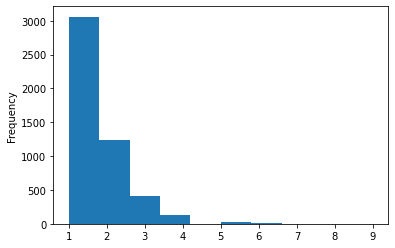

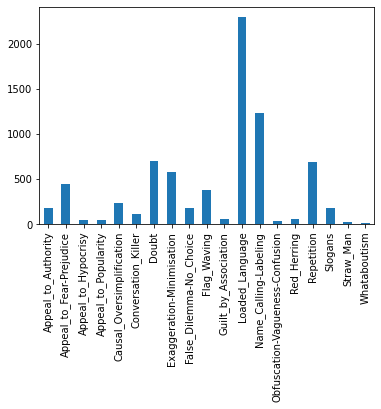

Appeal_to_Authority                 184
Appeal_to_Fear-Prejudice            451
Appeal_to_Hypocrisy                  48
Appeal_to_Popularity                 49
Causal_Oversimplification           237
Conversation_Killer                 116
Doubt                               706
Exaggeration-Minimisation           581
False_Dilemma-No_Choice             185
Flag_Waving                         383
Guilt_by_Association                 63
Loaded_Language                    2292
Name_Calling-Labeling              1229
Obfuscation-Vagueness-Confusion      31
Red_Herring                          63
Repetition                          686
Slogans                             181
Straw_Man                            24
Whataboutism                         18
dtype: int64
Index(['Appeal_to_Authority', 'Appeal_to_Fear-Prejudice',
       'Appeal_to_Hypocrisy', 'Appeal_to_Popularity',
       'Causal_Oversimplification', 'Conversation_Killer', 'Doubt',
       'Exaggeration-Minimisation', 'False_Dile

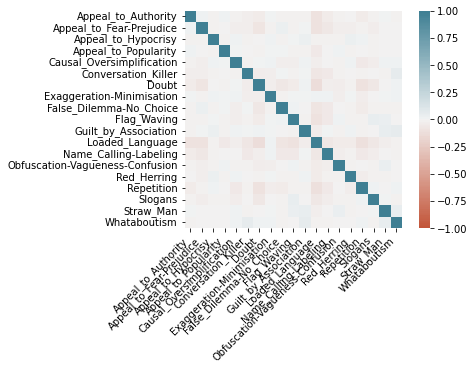

In [45]:
plot_carat(df_en)

In [31]:
df_mul_task3 = creat_task3_multi(['en','it','ge','ru','fr','po'])

C:\Users\au458226\OneDrive - Aarhus Universitet\Dokumenter\projekter\semEval\Task3


447it [00:00, 7590.35it/s]
90it [00:00, 5754.56it/s]
454it [00:00, 3456.66it/s]
152it [00:00, 9728.89it/s]
132it [00:00, 2471.93it/s]
45it [00:00, ?it/s]
249it [00:00, 2941.56it/s]
59it [00:00, ?it/s]
158it [00:00, 2980.96it/s]
53it [00:00, 3391.59it/s]
145it [00:00, 2246.74it/s]
49it [00:00, ?it/s]


In [32]:
df_mul_task3.shape

(17557, 3)

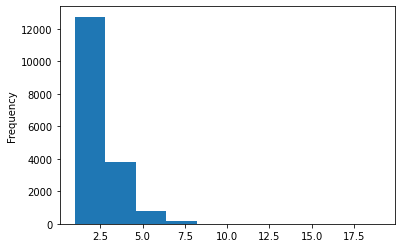

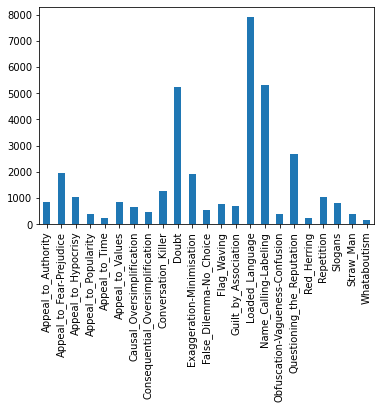

Appeal_to_Authority                  849
Appeal_to_Fear-Prejudice            1951
Appeal_to_Hypocrisy                 1055
Appeal_to_Popularity                 406
Appeal_to_Time                       230
Appeal_to_Values                     862
Causal_Oversimplification            677
Consequential_Oversimplification     457
Conversation_Killer                 1255
Doubt                               5242
Exaggeration-Minimisation           1901
False_Dilemma-No_Choice              563
Flag_Waving                          784
Guilt_by_Association                 692
Loaded_Language                     7903
Name_Calling-Labeling               5308
Obfuscation-Vagueness-Confusion      409
Questioning_the_Reputation          2693
Red_Herring                          239
Repetition                          1051
Slogans                              808
Straw_Man                            392
Whataboutism                         167
dtype: int64
Index(['Appeal_to_Authority', 'Appeal_to_Fea

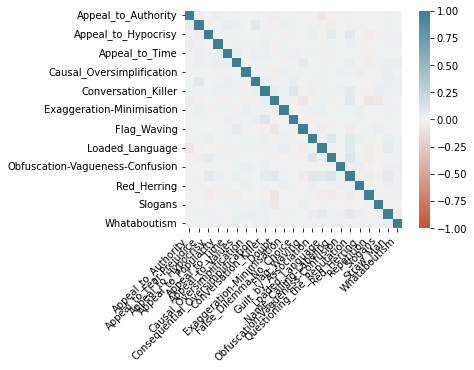

In [34]:
plot_carat(df_mul_task3)

In [36]:
df_mul_task2 = create_task2_multi(['en','en','it','ge','ru','fr','po'])

C:\Users\au458226\OneDrive - Aarhus Universitet\Dokumenter\projekter\semEval\Task3


433it [00:00, 2002.52it/s]
83it [00:00, 2655.92it/s]
433it [00:00, 11596.83it/s]
83it [00:00, ?it/s]
227it [00:00, 2264.29it/s]
76it [00:00, 1975.48it/s]
132it [00:00, 2669.51it/s]
45it [00:00, 2880.48it/s]
143it [00:00, 2022.69it/s]
48it [00:00, 3072.00it/s]
158it [00:00, 2717.72it/s]
53it [00:00, 3392.78it/s]
145it [00:00, 2144.95it/s]
49it [00:00, 1026.59it/s]


In [38]:
df_mul_task2.shape

(2108, 2)

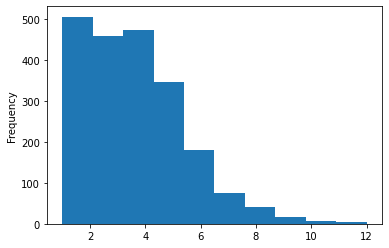

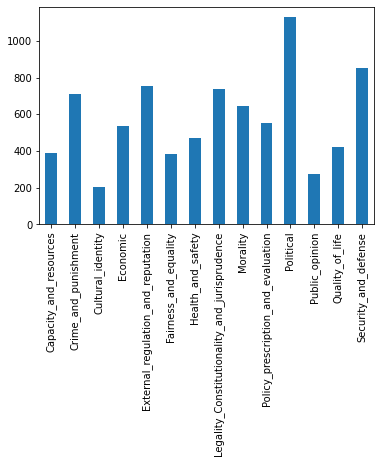

Capacity_and_resources                           391
Crime_and_punishment                             713
Cultural_identity                                205
Economic                                         538
External_regulation_and_reputation               753
Fairness_and_equality                            385
Health_and_safety                                473
Legality_Constitutionality_and_jurisprudence     738
Morality                                         644
Policy_prescription_and_evaluation               550
Political                                       1128
Public_opinion                                   274
Quality_of_life                                  424
Security_and_defense                             850
dtype: int64
Index(['Capacity_and_resources', 'Crime_and_punishment', 'Cultural_identity',
       'Economic', 'External_regulation_and_reputation',
       'Fairness_and_equality', 'Health_and_safety',
       'Legality_Constitutionality_and_jurisprudence', 'M

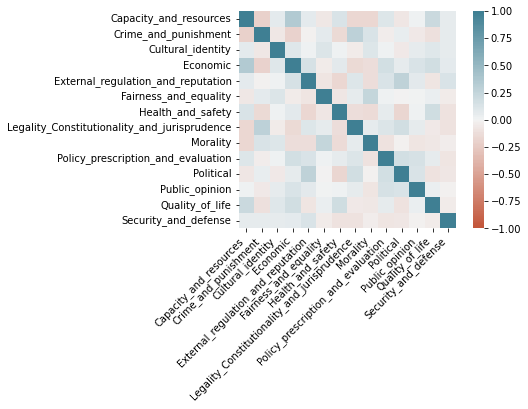

In [37]:
plot_carat(df_mul_task2)

In [40]:
df_it = creat_task3_multi(['it'])

C:\Users\au458226\OneDrive - Aarhus Universitet\Dokumenter\projekter\semEval\Task3


454it [00:00, 6083.91it/s]
152it [00:00, 9678.97it/s]


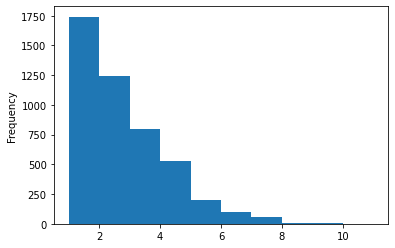

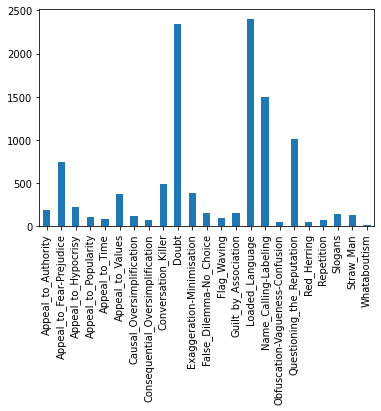

Appeal_to_Authority                  188
Appeal_to_Fear-Prejudice             742
Appeal_to_Hypocrisy                  218
Appeal_to_Popularity                 110
Appeal_to_Time                        86
Appeal_to_Values                     372
Causal_Oversimplification            124
Consequential_Oversimplification      76
Conversation_Killer                  494
Doubt                               2338
Exaggeration-Minimisation            382
False_Dilemma-No_Choice              154
Flag_Waving                           94
Guilt_by_Association                 150
Loaded_Language                     2398
Name_Calling-Labeling               1494
Obfuscation-Vagueness-Confusion       50
Questioning_the_Reputation          1010
Red_Herring                           54
Repetition                            74
Slogans                              148
Straw_Man                            132
Whataboutism                          18
dtype: int64
Index(['Appeal_to_Authority', 'Appeal_to_Fea

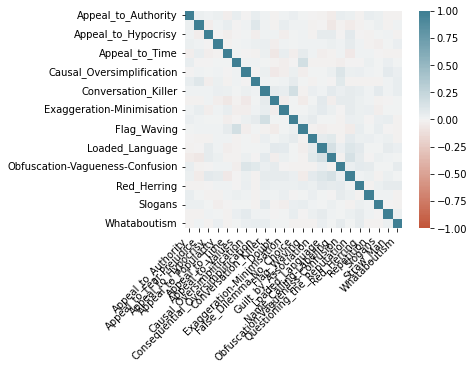

In [41]:
plot_carat(df_it)